In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot
import re
import wordcloud
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings

In [2]:
paper = pd.read_csv("/content/drive/MyDrive/Kodlar/Veri setleri/papers.csv")

print(paper.head())

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

In [3]:
paper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [ ]:
paper.drop(["id","event_type","pdf_name"],axis= 1,inplace= True)

paper.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


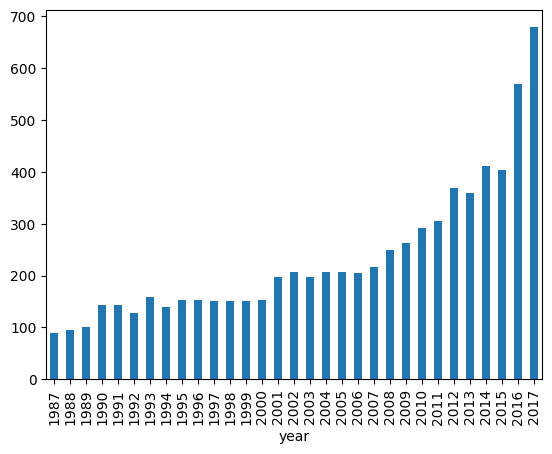

In [4]:
groups = paper.groupby("year")

# Determine the size of each group
count = groups.size()

# Visualise the counts as a bar plot

%matplotlib inline
count.plot(kind='bar');

In [5]:


paper['title_processed'] = paper['title'].map(lambda x: re.sub('[,\.!?]', '', x))

paper['title_processed'] = paper['title_processed'].str.lower()

print(paper.head())

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  \
0  767\n\nSELF-ORGANIZAT

To verify whether the preprocessing has been done correctly, we can create a word cloud from the titles of research articles. This will give us a visual representation of the most common words. Visualization is key to knowing if we are still on the right track! In addition, it allows us to verify whether we need additional pre-processing before further analyzing the text data.

Python has lots of open libraries! Instead of trying to develop a method for creating word clouds ourselves, we will use Andreas Mueller's wordcloud library.

In [ ]:
!pip install pytagcloud

In [ ]:
!pip install simplejson

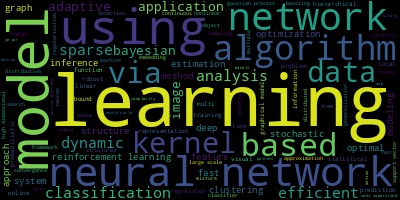

In [24]:
import wordcloud
# Join the different processed titles together.
long_string = ' '.join(paper['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

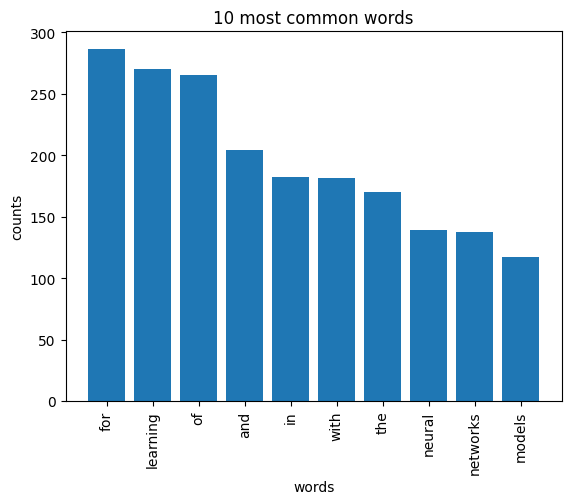

In [26]:


# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):

    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed titles
count_data = tfidf_vectorizer.fit_transform(paper['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, tfidf_vectorizer)

In [27]:

warnings.simplefilter("ignore", DeprecationWarning)

#Helper Function
def print_topic(model,count_vectorizer,n_top_words):
  words = count_vectorizer.get_feature_names_out()
  for topic_idx,topic in enumerate(model.components_):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([words[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

number_topics = 10
number_words = 10
# Tweak the two parameters below (use int values below 15)
lda = LDA(n_components=number_topics)

# Create and fit the LDA model
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topic(lda,count_vectorizer,number_words)

Topics found via LDA:

Topic #0:
for learning and of with in boosting multi neural classification

Topic #1:
learning and with for of reduction recognition kernel to neural

Topic #2:
of learning for in with and the data time networks

Topic #3:
learning for vector gaussian of support with supervised the and

Topic #4:
neural and of in with for analog learning vlsi to

Topic #5:
for learning of and bayesian in models with networks the

Topic #6:
for of the learning parametric and models non incremental squares

Topic #7:
for inference markov of models variational learning decision and hidden

Topic #8:
of learning the for and in with on analysis networks

Topic #9:
of for learning in networks with neural and memory sparse
